In [110]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler


In [111]:
test_index = pd.read_pickle("output/processed_dataset/text_index_list.pickle")

In [112]:
Xnl = pd.read_csv("output/processed_dataset/Xnl.csv").fillna(0)
Y_multlab = pd.read_csv("output/processed_dataset/Y_multlab.csv")
Y_num = pd.read_csv("output/processed_dataset/Y_num.csv")

In [113]:

Xnl_tr = Xnl[Xnl.index.isin(test_index)==False]
Ym_tr = Y_multlab[Y_multlab.index.isin(test_index)==False]
Yn_tr = Y_num[Y_num.index.isin(test_index)==False]
idx = np.random.permutation(Xnl_tr.index)
Xnl_tr = Xnl_tr.reindex(idx)
Ym_tr = Ym_tr.reindex(idx)
Yn_tr = Yn_tr.reindex(idx)

Xnl_te = Xnl[Xnl.index.isin(test_index)]
Ym_te = Y_multlab[Y_multlab.index.isin(test_index)]
Yn_te = Y_num[Y_num.index.isin(test_index)]

In [114]:
scaler = StandardScaler()
scaler.fit(Xnl_tr)
Xnl_tr = scaler.transform(Xnl_tr)
Xnl_te = scaler.transform(Xnl_te)


In [135]:
def boolres(x):
    #global result
    #result = x>5
    return  tf.reduce_sum(tf.cast(x, tf.float32),1)

In [152]:
model = Sequential()
model.add(Dense(50, input_dim=34, activation= "relu"))
model.add(Dense(25, activation= "relu"))
model.add(Dense(5, activation="sigmoid"))
model.add(Lambda(boolres))

model.summary() #Print model Summary
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model.fit(Xnl_tr, Yn_tr, epochs=50, verbose= 4,validation_split=0.2)


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 50)                1750      
                                                                 
 dense_109 (Dense)           (None, 25)                1275      
                                                                 
 dense_110 (Dense)           (None, 5)                 130       
                                                                 
 lambda_13 (Lambda)          (None,)                   0         
                                                                 
Total params: 3,155
Trainable params: 3,155
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50


In [120]:
result

<tf.Tensor 'sequential_25/lambda_2/Greater:0' shape=(None, 5) dtype=bool>

<AxesSubplot:>

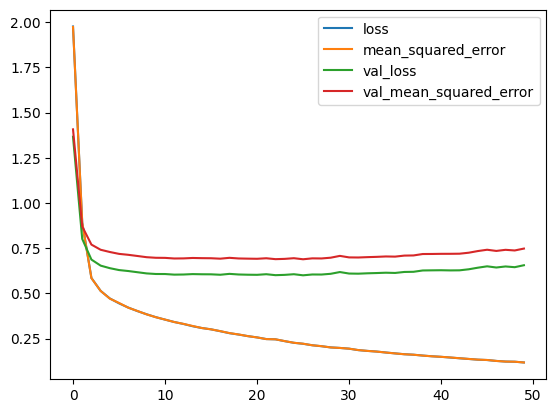

In [153]:
pd.DataFrame(history.history).plot()
#https://github.com/keras-team/keras/issues/13881

In [23]:
Ym_te.sum(axis=1).to_list()

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [108]:
check1 = 4
check2 = check1+1
pred[(pred[check2]>pred[check1])&(pred[check1]>0.1)&(pred[check1]<0.9)]

KeyError: 5

In [109]:
pred

,0,1,2,3,4
0,0.999097,0.997172,0.974099,0.756256,0.207585
1,0.995260,0.981083,0.853493,0.443862,0.155872
2,0.999787,0.998780,0.979129,0.715211,0.171098
3,0.990561,0.976049,0.674173,0.104621,0.030163
4,0.999142,0.993390,0.908495,0.654509,0.088926
...,...,...,...,...,...
294,0.997927,0.991989,0.962258,0.754655,0.328831
295,0.997828,0.995262,0.953829,0.743530,0.430023
296,0.999833,0.999262,0.997079,0.961211,0.613331
297,0.999647,0.998504,0.995413,0.864059,0.556663


In [154]:
pred= pd.DataFrame(model.predict(Xnl_te))
pred[1]>=pred[0]

10/10 [==============================] - 0s 2ms/step


KeyError: 1

In [146]:
Yn_te

,label
1,3
9,3
11,3
31,3
38,3
...,...
1466,5
1468,5
1473,5
1479,5


In [149]:
pred

,0
0,4.150376
1,3.596563
2,3.879299
3,2.673838
4,3.944125
...,...
294,3.916172
295,3.907562
296,4.568474
297,4.136003


In [155]:
pd.DataFrame({"real":Yn_te["label"].to_list(), "test":pred[0].to_list()}).groupby("real")["test"].describe()

,count,mean,std,min,25%,50%,75%,max
real,,,,,,,,
0,64.0,0.477500,0.631553,0.011596,0.093196,0.230340,0.529205,3.022370
1,62.0,1.102927,0.611114,0.100969,0.545361,1.115338,1.512383,2.697374
2,38.0,2.189975,0.993214,0.050560,1.670790,2.266986,2.798566,4.060989
3,51.0,3.181720,0.898387,0.304562,2.778542,3.112926,3.923403,4.714883
4,46.0,3.915811,0.668325,1.957824,3.537162,4.167838,4.399571,4.762667
5,38.0,4.541529,0.471251,2.557299,4.323478,4.717046,4.861646,4.997065


In [100]:
pd.DataFrame({"real":Ym_te.sum(axis=1).to_list(), "test":(model.predict(Xnl_te)>0.5).sum(axis=1)}).groupby("real").value_counts()

10/10 [==============================] - 0s 4ms/step


real  test
0     0       44
      1       18
      2        2
1     1       39
      0       12
      2       10
      3        1
2     3       14
      2       13
      1        6
      0        3
      4        2
3     3       27
      4       13
      2        6
      5        3
      1        1
      0        1
4     4       30
      3        9
      5        6
      2        1
5     5       20
      4       15
      3        3
dtype: int64

In [101]:
44+39+14+27+30+20

174

In [102]:
174/299

0.5819397993311036

In [72]:
33+41+18+20+25+19+15+15+4+

156

In [18]:
history.history

{'loss': [1.4389665126800537,
  0.614566445350647,
  0.5043257474899292,
  0.4381701648235321,
  0.4255949854850769,
  0.3935312032699585,
  0.3527161478996277,
  0.33295878767967224,
  0.3304332196712494,
  0.3106291890144348],
 'binary_crossentropy': [1.4389665126800537,
  0.614566445350647,
  0.5043257474899292,
  0.4381701648235321,
  0.4255949854850769,
  0.3935312032699585,
  0.3527161478996277,
  0.33295878767967224,
  0.3304332196712494,
  0.3106291890144348]}

In [21]:
Xnl_tr.fillna(0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1195 entries, 0 to 1493
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ADJ_0    1195 non-null   float64
 1   ADP_0    1195 non-null   float64
 2   ADV_0    1195 non-null   float64
 3   AUX_0    1195 non-null   float64
 4   CCONJ_0  1195 non-null   float64
 5   DET_0    1195 non-null   float64
 6   INTJ_0   1195 non-null   float64
 7   NOUN_0   1195 non-null   float64
 8   NUM_0    1195 non-null   float64
 9   PART_0   1195 non-null   float64
 10  PRON_0   1195 non-null   float64
 11  PROPN_0  1195 non-null   float64
 12  SCONJ_0  1195 non-null   float64
 13  VERB_0   1195 non-null   float64
 14  ADJ_1    1195 non-null   float64
 15  ADP_1    1195 non-null   float64
 16  ADV_1    1195 non-null   float64
 17  AUX_1    1195 non-null   float64
 18  CCONJ_1  1195 non-null   float64
 19  DET_1    1195 non-null   float64
 20  INTJ_1   1195 non-null   float64
 21  NOUN_1   1195 

In [5]:
import pickle

In [9]:
with open("ouptprocessed_dataset/text_index_list.pickle", 'rb') as f:
    x = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'processed_dataset/text_index_list.pickle'